
# Hypothesis Testing

---

- One-sample test (1 # variable)
    - t-test

* Two-sample test (1 # variable, 1 categorical variable with 2 modalities)
    * t-test

- N-sample test (1 # variable, 1 categorical variable with N modalities)
    * ANOVA
    * Pairwise

* Categorical test (2 categorical variables)
    * Chi-squared


In [5]:
import pandas as pd
import pyarrow.feather as feather
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats
import pingouin
import seaborn as sns
from scipy.stats import chisquare


## Introduction to Hypothesis Testing



Ace A/B testing! A/B testing lets you compare scenarios to see which best achieves some goal.

### Introduction

In [6]:
path = r'C:\Users\LLerma\Documents\GitHub\Learning\Datasets'

In [13]:
sample_dem_data = feather.read_feather(path+'\dem_votes_potus_12_16.feather')
late_shipments = feather.read_feather(path+'\late_shipments.feather')
sample_dem_data = feather.read_feather(path+ r'\repub_votes_potus_08_12.feather')
stack_overflow = feather.read_feather(path+'\stack_overflow.feather')

Hypothesis: The mean annual compensation of the population of the DS is $110,000

In [21]:
stack_overflow['converted_comp'].mean()

# Is this meaninfully different?

119574.71738168952

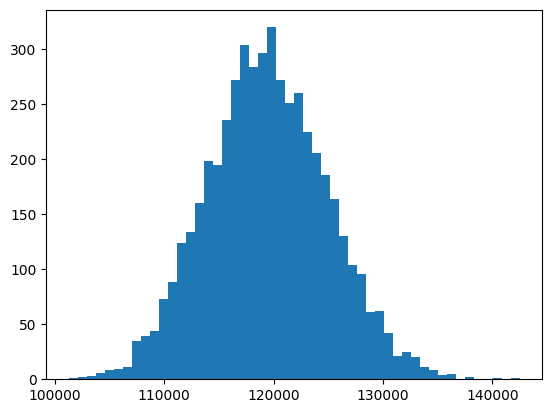

In [30]:
#Boostraping
so_bootn_distn = []

for i in range(5000):
    so_bootn_distn.append( np.mean(stack_overflow.sample(frac=1, replace=True)['converted_comp']))

plt.hist(so_bootn_distn, bins=50)
plt.show()

In [32]:
std_error = np.std(so_bootn_distn, ddof=1)

z_score = (sample_stat - hypoth_param_value) / std_error

#Output is 1.707, is this low or high?

In [37]:
# Excercise

late_prop_samp = (late_shipments['late'] == 'Yes').mean()

# Print the results
print(late_prop_samp)

# Cool calculating! The proportion of late shipments in the sample is 0.061, or 6.1%.

# Hypothesize that the proportion is 6%
late_prop_hyp = 0.06

# Calculate the standard error
std_error = 0.007488520883926666 #np.std(late_shipments_boot_distn, ddof=1)

# Find z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp) / std_error

# Print z_score
print(z_score)

0.061
0.13353771933071554


### p-value

- Large p-value : Fail to reject null hypothesis
- Small p-value : Reject null hypothesis

* If  $p <=$ $\alpha$ , reject $H_0$, else fail to reject $H_0$
* If the hypothesized population parameter is within the confidence interval, you should fail to reject the null hypothesis. If percentil_2.5% < z_score < percentil_97.5%, fail to reject $H_0$

```py
Alternative different - Two-tailed test 
Alternative less/fewer - Left tailed test
Alternative greater/exceeds - Right tailed test
```


In [95]:
#Excercise (right tail)

# Calculate the z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp) / std_error
print(z_score) 
# Calculate the p-value
p_value = 1 - norm.cdf(z_score, loc=0, scale=1)
                 
# Print the p-value
print(p_value) 

0.13353771933071554
0.4468840678346485


### Statistical significance

- Significance level can be, 0.2, 0.1, 0.5 and 0.01. The most popular is 5%
- Confidence intervals : 1 - $\alpha$

* False positive :  Type I error (p<$\alpha$, reject $H_0$)
* False negative : Type II error (p>$\alpha$, fail to reject $H_0$)

```py
alpha = 0.05

lowr = np.quantile(first_code_boot_distn, 0.0250)
upper = np.quantile(first_code_boot_distn, 0.975)

```

### Excercise
The null hypothesis, , is that the proportion of late shipments is six percent.

The alternative hypothesis, , is that the proportion of late shipments is greater than six percent.

p = 0.4468840678346485
p > $\alpha$, fail to reject $H_0$

Also, z_score=0.06 is  included in the confidence interval [0.047, 0.076], so we fail to reject $H_0$

---
## Two sample test, t-test and ANOVA (One categorical and one numeric variable)

* Using a sample standard deviation to estimate the standard error is computationally easier than using bootstrapping. However, to correct for the approximation, you need to use a t-distribution when transforming the test statistic to get the p-value.

* The normal distribution is essentially a t-distribution with infinite degrees of freedom.

$H_0$: Mean compensation is the same for those who started to code as child or adults

$H_1$: Mean compensation is greater for those who started as childs 

Can be translated to:

$H_0$: : $\mu_{child} = \mu_{adult}$  ---->  $\mu_{child} - \mu_{adult} = 0$

$H_1$: : $\mu_{child} > \mu_{adult}$   ---->  $\mu_{child} - \mu_{adult} > 0$

With groupby, we get:

adult_mean = 111313.311

child_mean = 132419.57

Is it significant or can it be xplained by sample variability?

$t = \frac{mean_1 - mean_2}{\sqrt{\frac{s1^2}{n} + \frac{s2^2}{n} }}$
---

```py
With groupby

Mean:
adult: 111313
child: 132419

Std:
adult: 271546
child: 255585

Count:
adult: 1376
child: 885
```

$t = 1.869$

$\alpha = 0.1$

$dof = nchild + nadult-2 = 2259$

```py
from scipy.stats import t

p = t.cdf(t_stat, df=x)

p = 0.0308

```

$p < \alpha$  -->  We reject H_0 

In [99]:
#Calculate the numerator of the test statistic
#numerator = xbar_no - xbar_yes

#Calculate the denominator of the test statistic
#denominator = np.sqrt((s_no**2)/(n_no) + (s_yes**2)/(n_yes))

#Calculate the test statistic
#t_stat = numerator / denominator

#-2.3936

In [ ]:
#Calculate the degrees of freedom
#degrees_of_freedom = n_yes + n_no -2

#Calculate the p-value from the test stat
p_value = t.cdf(t_stat, degrees_of_freedom)

#0.0084

#p < alpha; Reject H0

### Paired t-tests



Percentage of candidates lower in 2008 than 2012?

$H_0$ : $\mu2008$ - $\mu2012 = 0$

$H_1$ : $\mu2008$ - $\mu2012 < 0$

$\alpha = 0.05$

diff = votes_2008 - votes_2012

xbar_diff = diff.mean() # -2.87

$H_0$ : $\mu\char`_diff= 0$

$H_1$ : $\mu\char`_diff < 0$

df = n_diff - 1

s_diff = diff.std()

t_stat = xbar_diff / np.sqrt(s_diff**2 / n_diff)

t = -5.601

p = t.csf(t_stat, 99)
p = 9.57e-08

p < alpha, Reject H0. So, votes from 2008 were lower than in 2012


Other option if pingouin library

```py
import pingouin

pingouin.ttest(x=sample_data['diff'], y=0, alternative='less')

pingouin.ttest(x=sample_data_2008, y=sample_data_2012, paired=True, alternative='less')
```

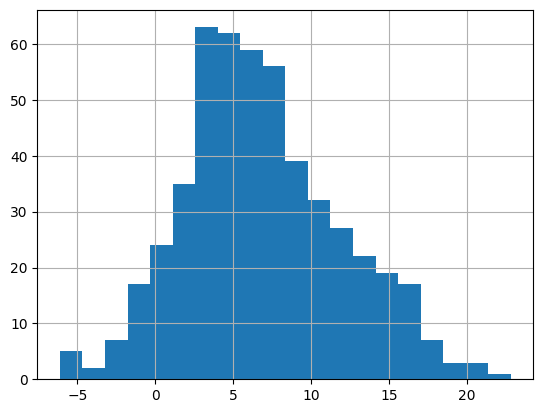

In [106]:
# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']

# Find the mean of the diff column
xbar_diff = sample_dem_data['diff'].mean()
# 6.829312660106834

# Find the standard deviation of the diff column
s_diff = sample_dem_data['diff'].std()

# Plot a histogram of diff with 20 bins
sample_dem_data['diff'].hist(bins=20)
plt.show()

In [113]:
# Conduct a t-test on diff
test_results = pingouin.ttest(x=sample_dem_data['diff'], 
                              y=0, 
                              alternative="two-sided")

# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x = sample_dem_data['dem_percent_12'], y = sample_dem_data['dem_percent_16'], paired = True, alternative = 'two-sided')

                              
# Print the test results
print(test_results)
print(paired_test_results)

                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  1.354985   

              BF10  power  
T-test  2.246e+111    1.0  
                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  0.454202   

              BF10  power  
T-test  2.246e+111    1.0  


The p-value from the unpaired test is greater than than the p-value from the paired test.

### ANOVA



Is a test for differences between groups (one categorical and one numeric variable)

**NOTE**: Extends t-tests to more than two groups

- $H_0 :$ No significant difference
- $H_1 :$ At least two categories have a significant difference

Is mean annual compensation different for different levels of job satisfaction?
```py
sns.boxplot(x,y,data) #'y' must be a categorical variable
```
$\alpha$ = 0.2

pingouin.anova(data, dv=numeric_var, between=categorical_var)

$p=0.001315 < \alpha$

* Means at least two categories have significantly different compensation, but we don't know which categories, so we have to perform a **pairwise_test**

```py
pingouin.pairwise_tests(data, 
                        dv=numeric_var, 
                        between=categorical_var,
                        padjust='none'    # No corrections
                                'bonf'    # Adjustments are meant to avoid false positives
                                'sidak'
                                'holm'
                                'fdr_bh'
                                'fdr_by') 
```

With this test, we can see the categories where there's a significant difference compensation.


shipment_mode
Air            39.712395
Air Charter     4.226667
Ocean           6.432273
Name: pack_price, dtype: float64
shipment_mode
Air            48.932861
Air Charter     0.992969
Ocean           5.303047
Name: pack_price, dtype: float64


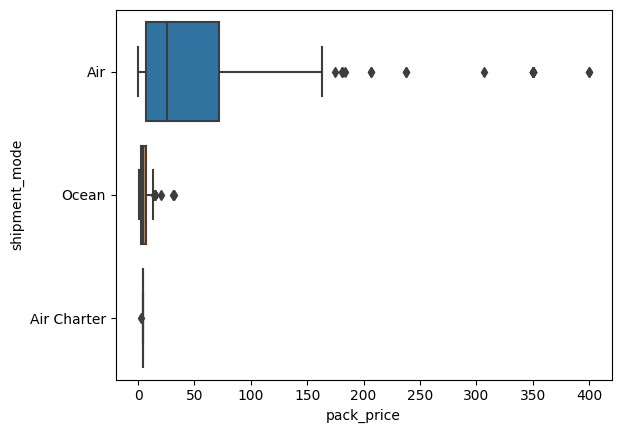

In [121]:
# Excercise

# Calculate the mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipments.groupby('shipment_mode')['pack_price'].mean()

# Print the grouped means
print(xbar_pack_by_mode)

# Calculate the standard deviation of the pack_price for each shipment_mode
s_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].std()

# Print the grouped standard deviations
print(s_pack_by_mode)

# Boxplot of shipment_mode vs. pack_price
sns.boxplot(x='pack_price', y='shipment_mode', data=late_shipments)
plt.show()

There certainly looks to be a difference in the pack price between each of the three shipment modes. Do you think the differences are statistically significant?

In [125]:
# Run an ANOVA for pack_price across shipment_mode
anova_results = pingouin.anova(late_shipments, dv='pack_price', between='shipment_mode')

# Print anova_results
print(anova_results)

# The p-value is less than or equal to the significance level, so the null hypothesis should be rejected.

          Source  ddof1  ddof2        F         p-unc       np2
0  shipment_mode      2    997  21.8646  5.089479e-10  0.042018


c:\Otro\Anaconda\envs\DA\lib\site-packages\pingouin\parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  sserror = grp.apply(lambda x: (x - x.mean()) ** 2).sum()


In [129]:
#No adjustment
# Modify the pairwise t-tests to use Bonferroni p-value adjustment
pairwise_results = pingouin.pairwise_tests(data=late_shipments, 
                                           dv="pack_price",
                                           between="shipment_mode",
                                           padjust="none")

# Print pairwise_results
print(pairwise_results)

        Contrast            A            B  Paired  Parametric          T  \
0  shipment_mode          Air  Air Charter   False        True  21.179625   
1  shipment_mode          Air        Ocean   False        True  19.335760   
2  shipment_mode  Air Charter        Ocean   False        True  -3.170654   

          dof alternative         p-unc       BF10    hedges  
0  600.685682   two-sided  8.748346e-75  5.809e+76  0.726592  
1  986.979785   two-sided  6.934555e-71  1.129e+67  0.711119  
2   35.615026   two-sided  3.123012e-03     15.277 -0.423775  


In [133]:
# Modify the pairwise t-tests to use Bonferroni p-value adjustment
pairwise_results = pingouin.pairwise_tests(data=late_shipments, 
                                           dv="pack_price",
                                           between="shipment_mode",
                                           padjust="bonf")

# Print pairwise_results
print(pairwise_results)

#Pairwise perfection! After applying the Bonferroni adjustment, the p-values for the t-tests between each 
#of the three groups are all less than 0.1.

#We reject Null hypothesis for each comparison, and we know there is a significant difference on each pair of the pack prices

        Contrast            A            B  Paired  Parametric          T  \
0  shipment_mode          Air  Air Charter   False        True  21.179625   
1  shipment_mode          Air        Ocean   False        True  19.335760   
2  shipment_mode  Air Charter        Ocean   False        True  -3.170654   

          dof alternative         p-unc        p-corr p-adjust       BF10  \
0  600.685682   two-sided  8.748346e-75  2.624504e-74     bonf  5.809e+76   
1  986.979785   two-sided  6.934555e-71  2.080367e-70     bonf  1.129e+67   
2   35.615026   two-sided  3.123012e-03  9.369037e-03     bonf     15.277   

     hedges  
0  0.726592  
1  0.711119  
2 -0.423775  


---

## Proportion Tests (Categorical variables)



### One sample



1. Standard error of sample statistic from bootstrap distribution
2. Compute a standarized test statistic
3. Calculate p-value
4. Decide which hypothesis made most sense


$Z: $ The test statistic for proportion(s) has only one estimate of a parameter instead of two.

$H_0: p = p_0$\
$H_1: p = p_0$

In this excercise:

$H_0:$ Proportion of users under 30 = 0.5  \
$H_1:$ Proportion of users under 30 != 0.5 

$\alpha = 0.01$

series.value_counts(normalize=True)

Under: 0.5356 -> p_hat \
At least: 0.4643

p_0 = 0.5\
n = 2261

```py
numerator = p_hat - p_0
denominator = np.sqrt(p_0 * (1-p_0) / n)

z_score = 3.3859

Two-tailed - "not equal"

p_value = norm.cdf(-z_score) + 1 - norm.cdf(z_score)
p_value = 2 * (1- norm.cdf(z_score))
p_value = 0.0007
```

$p\char`_value <= \alpha$

Proportion of users under 30 is not equal to 0.5

In [135]:
# Excercise, alternative hypothesis is greater than 6% (right tailed)

# Hypothesize that the proportion of late shipments is 6%
p_0 = 0.06

# Calculate the sample proportion of late shipments
p_hat = (late_shipments['late'] == "Yes").mean()

# Calculate the sample size
n = len(late_shipments)

# Calculate the numerator and denominator of the test statistic
numerator = p_hat - p_0
denominator = np.sqrt(p_0 * (1 - p_0) / n)

# Calculate the test statistic
z_score = numerator / denominator

# Calculate the p-value from the z-score
p_value = 1 - norm.cdf(z_score)

# Print the p-value
print(p_value)

0.44703503936503364


* While bootstrapping can be used to estimate the standard error of any statistic, it is computationally intensive. For proportions, using a simple equation of the hypothesized proportion and sample size is easier to compute.

### Two samples



$H_0: $ Proportion of hobbyist users is the same for those under thirty as those at least thirty **(independence)**\
$H_0: $ $p>=30 - p<30 = 0$

$H_1: $ Proportion of hobbyist users is different for those under thirty as those at least thirty **(association)**\
$H_1: $ $p>=30 - p<30 \not= 0$

$\alpha = 0.05$

```py
p_hats = stack_overflow.groupby('age_cat')['hobbyist'].value_counts(normalize=True)

n = stack_overflow.groupby('age_cat')['hobbyist'].count()

p_hat_at_least_30 = p_hats[('At least 30', 'Yes')]
p_hat_under_30 = p_hats[('Under 30', 'Yes')]

n_at_least_30 = n['At least 30']
n_under_30 = n['Under 30']

p_hat= (n_at_least_30 * p_hat_at_least_30+ n_under_30* p_hat_under_30) / (n_at_least_30+ n_under_30)
std_error = np.sqrt(p_hat* (1-p_hat) / n_at_least 30 + p_hat (1-p_hat) / n_under_30)
z_score= (p_hat_at_least_30 - p_hat_under_30) / std_error

z_score = -4.2237
```

It´s easier to do the following, with proportions_ztest():

```py
stack_overflow.groupby('age_cat')['hobbyist'].value_counts()

n_hobbyist = np.array([812, 1021])
n_rows = np.array([812 + 238, 1021 + 190])

from statsmodels.stats.proportion import proportions_ztest
z_score, p_value = proportions_ztest(count=n_hobbyists, nobd=n_rows, alternative='two-sided')

#z_score = -4.2236
#p_value=2.403e-05
```

$p < \alpha$, Reject $H_0$, the proportion is different (so they are associated)

In [143]:
# Excercise

"""
# You can calculate a p-value for a two sample proportion test using (a rather exhausting amount of) arithmetic. This tiny p-value leads us to suspect there is a larger proportion of late shipments for expensive freight compared to reasonable freight.

# Calculate the pooled estimate of the population proportion
#p_hat = (p_hats["reasonable"] * ns["reasonable"] + p_hats["expensive"] * ns["expensive"]) / (ns["reasonable"] + ns["expensive"])
p_hat = (0.082569*545 + 0.035165*455) / (545+455)

# Calculate p_hat one minus p_hat
p_hat_times_not_p_hat = p_hat * (1 - p_hat)

# Divide this by each of the sample sizes and then sum
p_hat_times_not_p_hat_over_ns = p_hat_times_not_p_hat / ns["expensive"] + p_hat_times_not_p_hat / ns["reasonable"]

# Calculate the standard error
std_error = np.sqrt(p_hat_times_not_p_hat_over_ns)

# Calculate the z-score
z_score = (p_hats["expensive"] - p_hats["reasonable"]) / std_error

# Calculate the p-value from the z-score
p_value = 1 - norm.cdf(z_score)

# Print p_value
# p_value=0.00090721

"""

'\n# You can calculate a p-value for a two sample proportion test using (a rather exhausting amount of) arithmetic. This tiny p-value leads us to suspect there is a larger proportion of late shipments for expensive freight compared to reasonable freight.\n\n# Calculate the pooled estimate of the population proportion\n#p_hat = (p_hats["reasonable"] * ns["reasonable"] + p_hats["expensive"] * ns["expensive"]) / (ns["reasonable"] + ns["expensive"])\np_hat = (0.082569*545 + 0.035165*455) / (545+455)\n\n# Calculate p_hat one minus p_hat\np_hat_times_not_p_hat = p_hat * (1 - p_hat)\n\n# Divide this by each of the sample sizes and then sum\np_hat_times_not_p_hat_over_ns = p_hat_times_not_p_hat / ns["expensive"] + p_hat_times_not_p_hat / ns["reasonable"]\n\n# Calculate the standard error\nstd_error = np.sqrt(p_hat_times_not_p_hat_over_ns)\n\n# Calculate the z-score\nz_score = (p_hats["expensive"] - p_hats["reasonable"]) / std_error\n\n# Calculate the p-value from the z-score\np_value = 1 - nor

In [144]:
""" 
# Count the late column values for each freight_cost_group
late_by_freight_cost_group = late_shipments.groupby("freight_cost_group")['late'].value_counts()

# Create an array of the "Yes" counts for each freight_cost_group
success_counts = np.array([45, 16])

# Create an array of the total number of rows in each freight_cost_group
n = np.array([45 + 500, 16 + 439])

# Run a z-test on the two proportions
stat, p_value = proportions_ztest(count=success_counts, nobs=n,
                                  alternative="larger")

# Print the results
print(stat, p_value)
"""
# z_score = 3.1190401865206128 
#p_value = 0.0009072060637051224

' \n# Count the late column values for each freight_cost_group\nlate_by_freight_cost_group = late_shipments.groupby("freight_cost_group")[\'late\'].value_counts()\n\n# Create an array of the "Yes" counts for each freight_cost_group\nsuccess_counts = np.array([45, 16])\n\n# Create an array of the total number of rows in each freight_cost_group\nn = np.array([45 + 500, 16 + 439])\n\n# Run a z-test on the two proportions\nstat, p_value = proportions_ztest(count=success_counts, nobs=n,\n                                  alternative="larger")\n\n# Print the results\nprint(stat, p_value)\n'

### Chi-square ($\chi^2$) test 

Used for more than 2 categories in one of the categorical variables.

**NOTE**: Extends proportions tests to more than two groups

$\chi^2$  = $z\char`_score^2$

**Statistical Independence**: Proportion of success in the response variable is the same across all categories of the explanatory variable (When the proportion is the same across all categories)

**NOTE**: Like the t-distribution, the chi-square distribution has degrees of freedom and non-centrality parameters. When these numbers are large, the chi-square distribution can be approximated by a normal distribution.

```py
expected, observed, stats = pingouin.chi2_independence(data=stack_overflow, x='hobyyist', y='age_cat', correction=False)
#From the last excercise, we get the same results for the first row (pearson test)
```
$H_0: $ Age categories are indepedent of job satisfaction levels\
$H_1: $ Age categories are not indepedent of job satisfaction levels (associated)

$\alpha = 0.1$

* Age_category with 2 categories
* Job_satisfaction with 5 categories (This is why we use ChiSqured instead of proportions)

```py
props = stack_overflow.groupby('job_sat')['age_cat'].value_counts(normalize=True)
>>>
job_sat                age_cat    
Very dissatisfied      Under 30       0.509434
                       At least 30    0.490566
Slightly dissatisfied  Under 30       0.532164
                       At least 30    0.467836
Neither                Under 30       0.567164
                       At least 30    0.432836
Slightly satisfied     Under 30       0.564706
                       At least 30    0.435294
Very satisfied         Under 30       0.511945
                       At least 30    0.488055
Name: age_cat, dtype: float64


wide_props = props.unstack()
>>>
age_cat	At least 30	Under 30
job_sat		
Very dissatisfied	0.490566	0.509434
Slightly dissatisfied	0.467836	0.532164
Neither	0.432836	0.567164
Slightly satisfied	0.435294	0.564706
Very satisfied	0.488055	0.511945


wide_props.plot(kind='bar', stacked=True)
```


<AxesSubplot: xlabel='job_sat'>

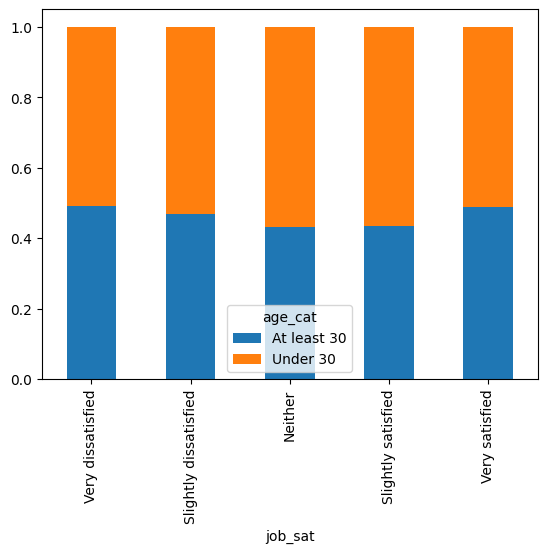

In [154]:
props = stack_overflow.groupby('job_sat')['age_cat'].value_counts(normalize=True)
wide_props = props.unstack()
wide_props.plot(kind='bar', stacked=True)

In [156]:
expected, observed, stats = pingouin.chi2_independence(data=stack_overflow, x='job_sat', y='age_cat', correction=False)

# Age category is explanatory
# Job satisfaction category is response

print(stats)

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  5.552373  4.0  0.235164  0.049555  0.437417
1        cressie-read  0.666667  5.554106  4.0  0.235014  0.049563  0.437545
2      log-likelihood  0.000000  5.558529  4.0  0.234632  0.049583  0.437871
3       freeman-tukey -0.500000  5.562688  4.0  0.234274  0.049601  0.438178
4  mod-log-likelihood -1.000000  5.567570  4.0  0.233854  0.049623  0.438538
5              neyman -2.000000  5.579519  4.0  0.232828  0.049676  0.439419


$DoF : (No.of Response Categories - 1) * (No. of ExplanatoryCategories - 1)$\
$(2-1)*(5-1) = 4$

p = 0.23 > $\alpha$, so we can conclude that age categories are independent of job satisfaction

In [158]:
#Changing the order

stack_overflow.groupby('age_cat')['job_sat'].value_counts(normalize=True)

age_cat      job_sat              
At least 30  Very satisfied           0.408571
             Slightly satisfied       0.281905
             Slightly dissatisfied    0.152381
             Neither                  0.082857
             Very dissatisfied        0.074286
Under 30     Very satisfied           0.371594
             Slightly satisfied       0.317093
             Slightly dissatisfied    0.150289
             Neither                  0.094137
             Very dissatisfied        0.066887
Name: job_sat, dtype: float64

In [159]:
expected, observed, stats = pingouin.chi2_independence(data=stack_overflow, x='age_cat', y='job_sat', correction=False)

# Age category is response
# Job satisfaction category is explanatory
print(stats)

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  5.552373  4.0  0.235164  0.049555  0.437417
1        cressie-read  0.666667  5.554106  4.0  0.235014  0.049563  0.437545
2      log-likelihood  0.000000  5.558529  4.0  0.234632  0.049583  0.437871
3       freeman-tukey -0.500000  5.562688  4.0  0.234274  0.049601  0.438178
4  mod-log-likelihood -1.000000  5.567570  4.0  0.233854  0.049623  0.438538
5              neyman -2.000000  5.579519  4.0  0.232828  0.049676  0.439419


Results are identical

* Chi-squared tests are almost always right-tailed tests

In [165]:
# Excercise

# Proportion of freight_cost_group grouped by vendor_inco_term
props = late_shipments.groupby('vendor_inco_term')['freight_cost_groups'].value_counts(normalize=True)

# Convert props to wide format
wide_props = props.unstack()

# Proportional stacked bar plot of freight_cost_group vs. vendor_inco_term
#wide_props.plot(kind="bar", stacked=True)
#plt.show()

# Determine if freight_cost_group and vendor_inco_term are independent
expected, observed, stats = pingouin.chi2_independence(data=late_shipments, x='freight_cost_groups', y='vendor_inco_term', correction=False)


# Print results
print(stats[stats['test'] == 'pearson']) 


### Reject the null hypothesis and conclude that vendor_inco_term and freight_cost_group are associated

      test  lambda       chi2  dof          pval    cramer     power
0  pearson     1.0  34.805072  4.0  5.093922e-07  0.186561  0.999235


c:\Otro\Anaconda\envs\DA\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
c:\Otro\Anaconda\envs\DA\lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
c:\Otro\Anaconda\envs\DA\lib\site-packages\scipy\stats\stats.py:6716: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
c:\Otro\Anaconda\envs\DA\lib\site-packages\scipy\stats\stats.py:6716: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
c:\Otro\Anaconda\envs\DA\lib\site-packages\scipy\stats\stats.py:6713: RuntimeWarning: divide by zero encountered in divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


### $\chi^2$ goodness of fit tests

It's used to compare a single categorical variable to a hypothesized distribution

* The test to compare the proportions of a categorical variable to a hypothesized distribution is called a chi-square goodness of fit test.

In [177]:
purple_link_counts = stack_overflow['purple_link'].value_counts()
purple_link_counts

Hello, old friend    1225
Indifferent           405
Amused                368
Annoyed               263
Name: purple_link, dtype: int64

In [178]:
purple_link_counts = purple_link_counts.rename_axis('purple_link').reset_index(name='n').sort_values('purple_link', ascending=True)
purple_link_counts

,purple_link,n
2,Amused,368
3,Annoyed,263
0,"Hello, old friend",1225
1,Indifferent,405


In [179]:
hypothesized = pd.DataFrame({'purple_link' : ['Amused', 'Annoyed', 'Hello, old friend', 'Indifferent'],\
                                'prop': [1/6,1/6,1/2,1/6]})
hypothesized

,purple_link,prop
0,Amused,0.166667
1,Annoyed,0.166667
2,"Hello, old friend",0.500000
3,Indifferent,0.166667


$H_0:$ The sample matches the hypothesized distribution\
$H_1:$ The sample does not match the hypothesized distribution

$\chi^2$, measures how well our hypothesized data fits the observed data.


$\alpha = 0.01$


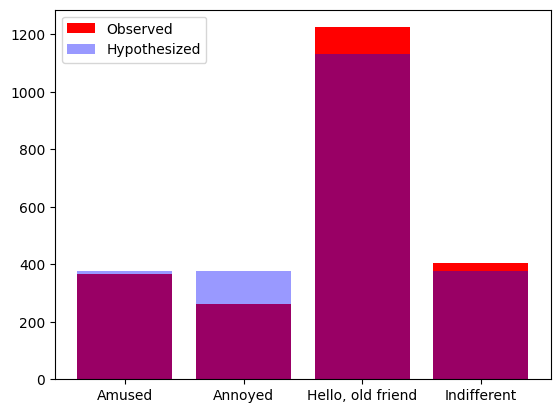

In [185]:
n_total = len(stack_overflow)
hypothesized['n'] = hypothesized['prop'] * n_total

plt.bar(purple_link_counts['purple_link'], purple_link_counts['n'], color='red', label='Observed')
plt.bar(hypothesized['purple_link'], hypothesized['n'], alpha=0.4 ,color='blue', label='Hypothesized')
plt.legend()
plt.show()

In [187]:
chisquare(f_obs=purple_link_counts['n'], f_exp=hypothesized['n'])

Power_divergenceResult(statistic=44.59840778416629, pvalue=1.1261810719413759e-09)

$p < \alpha$, so we conclude that the sample distribution of proportion is different from the hypothesized distribution.



```py 
#Excercise (hypothesized df not generated for this excercise)

#Find the number of rows in late_shipments
n_total = len(late_shipments)

#Create n column that is prop column * n_total
hypothesized["n"] = hypothesized["prop"] * n_total

#Plot a red bar graph of n vs. vendor_inco_term for incoterm_counts
plt.bar(incoterm_counts['vendor_inco_term'], incoterm_counts['n'], color="red", label="Observed")

#Add a blue bar plot for the hypothesized counts
plt.bar(hypothesized['vendor_inco_term'],hypothesized['n'], label="Hypothesized", alpha=0.5, color='blue')
plt.legend()
plt.show()
```



NOTE: Two of the bars in the sample are very close to the hypothesized values: one is a little high and one is a little low. Head on over to the next exercise to test if these differences are statistically significant.

---

## Non-parametric Tests

It's important to consider these assumptions:

1. Randomness

2. Independence

    All hypothesis tests assume that the data are collected at random from the population, that each row is independent of the others, and that the sample size is "big enough".

3. Sample size

    Two sample t-tests; both n > 30\
One sample proportion test, p > 10\
Chi square independence tests, n > 5\
ANOVA test, n > 30

### Parametric tests
- z-test
- t-test
- ANOVA

These tests:
* Assume a normal distribution
* Need sufficiently large sample sizes



### Non-parametric tests

* Avoid parametric assumptions and conditions
* It can be used when the size of the data is small or it cannot be assumed to be normally distributed


In [12]:
from scipy.stats import rankdata

x = [1,15,3,10,6]
rankdata(x)

array([1., 5., 2., 4., 3.])

We will use de Wilcox-signed rank test
* Works on the ranked absoulte differences betweem the pairs of data
* The Wilcoxon signed-rank test works well when the assumptions of a paired t-test aren't met.

1. Create a Diff column
2. Get the absolute value
3. Rank the absolute_difference column
4. Calculating a tests statistic called W
    * Incorporate the sum of the ranks for negative and positive differences

```py
T_mins = a+b+c
T_plus = 0

W = np.min([T_minus, T_plus])
#W = 0

#OR

alpha=0.01

pingouin.wilcoxon(x=series_x, y=series_y, alternative = 'less')
```

$p > \alpha$ (Fail to reject $H_0$), there's no evidence that y percentages are smaller than x percentages. No significance difference.

In [18]:
#Excercise

# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x=sample_dem_data['repub_percent_08'], y=sample_dem_data['repub_percent_12'], paired=True, alternative= 'less') 

print('08: ', sample_dem_data['repub_percent_08'].mean())
print('12: ', sample_dem_data['repub_percent_12'].mean())

# Print paired t-test results
print(paired_test_results)


# Reject H0, percentage in 08 is less than percentage in 2012

08:  58.06312281891949
12:  60.940231860162406
               T  dof alternative         p-val          CI95%   cohen-d  \
T-test -5.601043   99        less  9.572537e-08  [-inf, -2.02]  0.217364   

             BF10     power  
T-test  1.323e+05  0.696338  


### Non-parametric ANOVA and unpaired t-tests

The Wilcoxon-Mann-Whitney test is a t-test in ranked data.

* Also known as the Mann Whitney U test
* A t-test on the ranks of unmeric input
* Works on unpaired data
* It works on wide format

In [28]:
ags_vs_comp = stack_overflow[['converted_comp','age_first_code_cut']]
age_vs_comp_wide = ags_vs_comp.pivot(columns = 'age_first_code_cut', values='converted_comp') #Doesn't aggregate, return raw values
age_vs_comp_wide.head()

age_first_code_cut,adult,child
0,77556.0,NaN
1,NaN,74970.0
2,NaN,594539.0
3,2000000.0,NaN
4,37816.0,NaN


In [29]:
alpha = 0.01

pingouin.mwu(x=age_vs_comp_wide['child'], y=age_vs_comp_wide['adult'], alternative = 'greater')

#Those who started coding as childs, have a higher income than thouse who started as adults

#p<alpha

,U-val,alternative,p-val,RBC,CLES
MWU,744365.5,greater,1.902723e-19,-0.222516,0.611258


Kruskal-Wallis test extends the Wilcoxon test to more than two groups.

K-W is to W-M-W test as ANOVA is to t-test

In [31]:
alpha = 0.01

pingouin.kruskal(data=stack_overflow, dv = 'converted_comp', between='job_sat')

,Source,ddof1,H,p-unc
Kruskal,job_sat,4,72.814939,5.772915e-15


$p < \alpha$ (Reject $H_0$), there is at least one of the mean compensation totals, is different than the others across these five job satisfaction groups.

In [33]:
#_Excercise

# Select the weight_kilograms and late columns
weight_vs_late = late_shipments[['weight_kilograms','late']]

# Convert weight_vs_late into wide format
weight_vs_late_wide = weight_vs_late.pivot(columns='late', 
                                           values='weight_kilograms')


# Run a two-sided Wilcoxon-Mann-Whitney test on weight_kilograms vs. late
wmw_test = pingouin.mwu(x=weight_vs_late_wide['No'], y=weight_vs_late_wide['Yes'], alternative = 'two-sided')



# Print the test results
print(wmw_test)

       U-val alternative     p-val       RBC      CLES
MWU  19134.0   two-sided  0.000014  0.331902  0.334049


 The small p-value here leads us to suspect that a difference does exist in the weight of the shipment and whether or not it was late. The Wilcoxon-Mann-Whitney test is useful when you cannot satisfy the assumptions for a parametric test comparing two means, like the t-test.

In [35]:
# Run a Kruskal-Wallis test on weight_kilograms vs. shipment_mode
kw_test = pingouin.kruskal(data=late_shipments, dv = 'weight_kilograms', between='shipment_mode')

# Print the results
print(kw_test)

                Source  ddof1           H         p-unc
Kruskal  shipment_mode      2  125.096618  6.848799e-28


The Kruskal-Wallis test yielded a very small p-value, so there is evidence that at least one of the three groups of shipment mode has a different weight distribution than the others. Th Kruskal-Wallis test is comparable to an ANOVA, which tests for a difference in means across multiple groups.